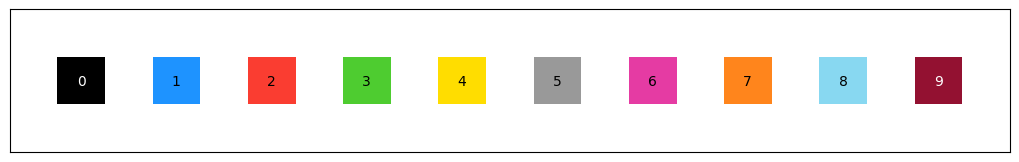

In [1]:
import sys
import json
import shutil
sys.path.append("../inputs/google-code-golf-2025/code_golf_utils")
from code_golf_utils import *
show_legend()

In [2]:
def get_examples(task_num):
    examples = load_examples(task_num)
    show_examples(examples['train'] + examples['test'])
    return examples

def save_file(task_num, sub_dir="/kaggle/working/submission/"):
    task_path = os.path.join(sub_dir, f"task{task_num:03d}.py")
    os.makedirs(sub_dir, exist_ok=True)
    shutil.copy("task.py", task_path)
    
def show_grid(out_grid, in_grid, ans_grid, figsize=(12, 4), k=-0.11):
    # Colors for each index
    colors = [
        (0, 0, 0),
        (30, 147, 255),
        (250, 61, 49),
        (78, 204, 48),
        (255, 221, 0),
        (153, 153, 153),
        (229, 59, 163),
        (255, 133, 28),
        (136, 216, 241),
        (147, 17, 49),
    ]
    colors = [(r/255, g/255, b/255) for r, g, b in colors]

    def plot_ax(ax, arr):
        rows = len(arr)
        cols = len(arr[0])
        # Draw each cell
        for y in range(rows):
            for x in range(cols):
                color = colors[arr[y][x]]
                rect = plt.Rectangle((x, y), 1, 1, facecolor=color, edgecolor="white")
                ax.add_patch(rect)

        # Axis limits
        ax.set_xlim(0, cols)
        ax.set_ylim(0, rows)
        # Center ticks in each cell
        ax.set_xticks([i + 0.5 for i in range(cols)])
        ax.set_yticks([i + 0.5 for i in range(rows)])
        # Label ticks as integers
        ax.set_xticklabels(range(cols))
        ax.set_yticklabels(range(rows))
        ax.tick_params(axis='both', length=0)
        # Move x-axis labels to top
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
        # Invert y-axis so 0 is at the top
        ax.invert_yaxis()
        # Square cells
        ax.set_aspect('equal')

    fig, ax = plt.subplots(1, 3, figsize=figsize)
    plot_ax(ax[0],out_grid)
    ax[0].set_title("Output",y=k)
    plot_ax(ax[1], in_grid)
    ax[1].set_title("Input",y=k)
    plot_ax(ax[2],ans_grid)
    ax[2].set_title("Answer",y=k)
    plt.show()

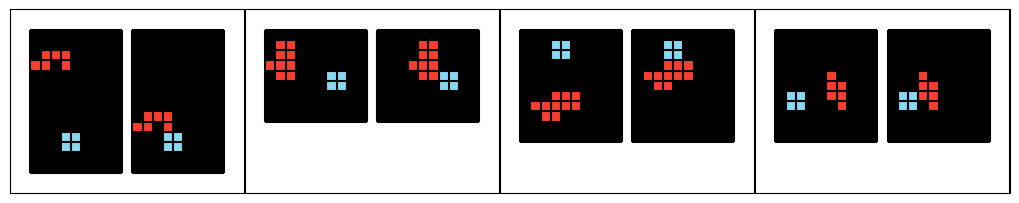

In [3]:
task_num = 8
examples = get_examples(task_num)

In [4]:
def p(g):
    """
    与えられるリストには、2で構成される図形と8で構成される2×2マスの図形が存在する。
    それらがリスト内で離れた位置に存在する。ただし、離れている方向が上下左右のどれかである。
    そこで、まずリスト内で2×2マスの8の図形を探索し、次に8の図形の上下左右を探索
    （8で構成される図形は2×2マスなので、上下左右を2マスの太さで探索）し、
    2の図形が上下左右のどこに、何マス分離れて存在するか見つける。
    最後に、すべての2のマスを離れているマス目分だけ近づける方向に移動させる。
    """
    
    # グリッドのコピーを作成（元のグリッドを変更しないため）
    result_grid = [row[:] for row in g]
    
    # ステップ1: 8で構成される2×2の図形を探索
    eight_positions = []
    for r in range(len(g)):
        for c in range(len(g[0])):
            if g[r][c] == 8:
                eight_positions.append((r, c))
    
    if not eight_positions:
        return result_grid  # 8が見つからない場合はそのまま返す
    
    # 8の図形の境界を特定（2×2の矩形を想定）
    eight_rows = [pos[0] for pos in eight_positions]
    eight_cols = [pos[1] for pos in eight_positions]
    eight_min_row = min(eight_rows)
    eight_max_row = max(eight_rows)
    eight_min_col = min(eight_cols)
    eight_max_col = max(eight_cols)
    
    print(f"8の図形の境界: 行 [{eight_min_row}, {eight_max_row}], 列 [{eight_min_col}, {eight_max_col}]")
    
    # ステップ2: 2で構成される図形を探索
    two_positions = []
    for r in range(len(g)):
        for c in range(len(g[0])):
            if g[r][c] == 2:
                two_positions.append((r, c))
    
    if not two_positions:
        return result_grid  # 2が見つからない場合はそのまま返す
    
    # 2の図形の境界を特定
    two_rows = [pos[0] for pos in two_positions]
    two_cols = [pos[1] for pos in two_positions]
    two_min_row = min(two_rows)
    two_max_row = max(two_rows)
    two_min_col = min(two_cols)
    two_max_col = max(two_cols)
    
    print(f"2の図形の境界: 行 [{two_min_row}, {two_max_row}], 列 [{two_min_col}, {two_max_col}]")
    
    # ステップ3: 8の図形の中心と2の図形の中心を計算
    eight_center_row = (eight_min_row + eight_max_row) / 2
    eight_center_col = (eight_min_col + eight_max_col) / 2
    two_center_row = (two_min_row + two_max_row) / 2
    two_center_col = (two_min_col + two_max_col) / 2
    
    print(f"8の図形の中心: ({eight_center_row}, {eight_center_col})")
    print(f"2の図形の中心: ({two_center_row}, {two_center_col})")
    
    # ステップ4: 2の図形が8の図形のどの方向にあるかを判定
    # 上下左右のどちらかの方向に離れているかを判定
    row_diff = eight_center_row - two_center_row
    col_diff = eight_center_col - two_center_col
    
    print(f"中心間の差: 行差={row_diff}, 列差={col_diff}")
    
    # どの方向に移動するかを決定
    move_row = 0
    move_col = 0
    
    if abs(row_diff) > abs(col_diff):
        # 縦方向の移動が主
        if row_diff > 0:
            # 2は8より上にある → 下に移動
            # 2の図形の下端が8の図形の上端に隣接するまでの距離
            move_row = eight_min_row - two_max_row - 1
            print(f"2の図形を下に {move_row} マス移動")
        else:
            # 2は8より下にある → 上に移動
            # 2の図形の上端が8の図形の下端に隣接するまでの距離
            move_row = eight_max_row - two_min_row + 1
            print(f"2の図形を上に {-move_row} マス移動")
    else:
        # 横方向の移動が主
        if col_diff > 0:
            # 2は8より左にある → 右に移動
            # 2の図形の右端が8の図形の左端に隣接するまでの距離
            move_col = eight_min_col - two_max_col - 1
            print(f"2の図形を右に {move_col} マス移動")
        else:
            # 2は8より右にある → 左に移動
            # 2の図形の左端が8の図形の右端に隣接するまでの距離
            move_col = eight_max_col - two_min_col + 1
            print(f"2の図形を左に {-move_col} マス移動")
    
    # ステップ5: 2の図形を移動
    # まず元の2の位置をクリア
    for r, c in two_positions:
        result_grid[r][c] = 0
    
    # 新しい位置に2を配置
    for r, c in two_positions:
        new_r = r + move_row
        new_c = c + move_col
        
        # 境界チェック
        if 0 <= new_r < len(result_grid) and 0 <= new_c < len(result_grid[0]):
            result_grid[new_r][new_c] = 2
        else:
            print(f"警告: 位置 ({new_r}, {new_c}) がグリッドの境界外です")
    
    return result_grid

In [5]:
def p(g):
 r=[row[:]for row in g]
 e=[(i,j)for i in range(len(g))for j in range(len(g[0]))if g[i][j]==8]
 t=[(i,j)for i in range(len(g))for j in range(len(g[0]))if g[i][j]==2]
 if not e or not t:return r
 er=[x[0]for x in e];ec=[x[1]for x in e];tr=[x[0]for x in t];tc=[x[1]for x in t]
 em,eM,en,eN=min(er),max(er),min(ec),max(ec);tm,tM,tn,tN=min(tr),max(tr),min(tc),max(tc)
 rd,cd=(em+eM-tm-tM)/2,(en+eN-tn-tN)/2
 mr=mc=0
 if abs(rd)>abs(cd):mr=em-tM-1if rd>0else eM-tm+1
 else:mc=en-tN-1if cd>0else eN-tn+1
 for i,j in t:r[i][j]=0
 for i,j in t:
  if 0<=i+mr<len(r)and 0<=j+mc<len(r[0]):r[i+mr][j+mc]=2
 return r

In [6]:
def p(g):
 r=[row[:]for row in g];e=[(i,j)for i in range(len(g))for j in range(len(g[0]))if g[i][j]==8];t=[(i,j)for i in range(len(g))for j in range(len(g[0]))if g[i][j]==2]
 if not e or not t:return r
 er,ec,tr,tc=[x[0]for x in e],[x[1]for x in e],[x[0]for x in t],[x[1]for x in t];em,eM,en,eN,tm,tM,tn,tN=min(er),max(er),min(ec),max(ec),min(tr),max(tr),min(tc),max(tc);rd,cd=(em+eM-tm-tM)/2,(en+eN-tn-tN)/2;mr,mc=(em-tM-1if rd>0else eM-tm+1,0)if abs(rd)>abs(cd)else(0,en-tN-1if cd>0else eN-tn+1)
 for i,j in t:r[i][j]=0
 for i,j in t:
  if 0<=i+mr<len(r)and 0<=j+mc<len(r[0]):r[i+mr][j+mc]=2
 return r

In [7]:
with open("../inputs/google-code-golf-2025/task008.json", "r", encoding="utf-8") as f:
  task_data = json.load(f)

example = task_data["train"][0]
input_grid = example["input"]
expected_output = example["output"]
actual_output = p(input_grid)

is_correct = actual_output == expected_output
status = "✓ 成功" if is_correct else "✗ 失敗"

print(input_grid)
print(expected_output)
print(actual_output)
print(status)

[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 2, 0, 0, 0, 0, 0], [2, 2, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 2, 0, 0, 0, 0, 0], [2, 2, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0

In [8]:
def test_all(task_num, solution_function=p, show_details=True):
    # テストデータと訓練データ、arc-genデータすべてでテストする機能強化版テスト関数
    with open(f"../inputs/google-code-golf-2025/task{task_num:03d}.json", "r", encoding="utf-8") as f:
        task_data = json.load(f)
    
    # 訓練データのテスト
    train_success = 0
    train_total = len(task_data["train"])
    if show_details:
        print("===== 訓練データ =====")
    
    for i, example in enumerate(task_data["train"]):
        input_grid = example["input"]
        expected_output = example["output"]
        actual_output = solution_function(input_grid)
        
        is_correct = actual_output == expected_output
        if is_correct:
            train_success += 1
        
        if show_details:
            status = "✓ 成功" if is_correct else "✗ 失敗"
            print(f"Train例{i+1}: {status}")
    
    if show_details or train_success < train_total:
        print(f"訓練データの成功率: {train_success}/{train_total}")
    
    # テストデータのテスト
    test_success = 0
    test_total = len(task_data["test"])
    if show_details:
        print("\n===== テストデータ =====")
    
    for i, example in enumerate(task_data["test"]):
        input_grid = example["input"]
        expected_output = example["output"]
        actual_output = solution_function(input_grid)
        
        is_correct = actual_output == expected_output
        if is_correct:
            test_success += 1
        
        if show_details:
            status = "✓ 成功" if is_correct else "✗ 失敗"
            print(f"Test例{i+1}: {status}")
    
    if show_details or test_success < test_total:
        print(f"テストデータの成功率: {test_success}/{test_total}")
    
    # arc-genデータのテスト (追加された部分)
    arcgen_success = 0
    arcgen_total = len(task_data.get("arc-gen", []))
    
    if arcgen_total > 0:
        if show_details:
            print("\n===== ARC-GENデータ =====")
        
        for i, example in enumerate(task_data["arc-gen"]):
            input_grid = example["input"]
            expected_output = example["output"]
            actual_output = solution_function(input_grid)
            
            is_correct = actual_output == expected_output
            if is_correct:
                arcgen_success += 1
            
            if show_details:
                status = "✓ 成功" if is_correct else "✗ 失敗"
                print(f"ARC-GEN例{i+1}: {status}")
        
        if show_details or arcgen_success < arcgen_total:
            print(f"ARC-GENデータの成功率: {arcgen_success}/{arcgen_total}")
    
    # 総合成功率
    total_success = train_success + test_success + arcgen_success
    total_examples = train_total + test_total + arcgen_total
    
    print("\n===== 総合評価 =====")
    print(f"総合成功率: {total_success}/{total_examples} ({total_success/total_examples*100:.2f}%)")
    
    # 全例成功したかどうか
    all_passed = total_success == total_examples
    print(f"全テスト通過: {'✓ 成功' if all_passed else '✗ 失敗'}")
    
    return all_passed

In [9]:
# テスト実行
test_all(8, p)

===== 訓練データ =====
Train例1: ✓ 成功
Train例2: ✓ 成功
Train例3: ✓ 成功
訓練データの成功率: 3/3

===== テストデータ =====
Test例1: ✓ 成功
テストデータの成功率: 1/1

===== ARC-GENデータ =====
ARC-GEN例1: ✓ 成功
ARC-GEN例2: ✓ 成功
ARC-GEN例3: ✓ 成功
ARC-GEN例4: ✓ 成功
ARC-GEN例5: ✓ 成功
ARC-GEN例6: ✓ 成功
ARC-GEN例7: ✓ 成功
ARC-GEN例8: ✓ 成功
ARC-GEN例9: ✓ 成功
ARC-GEN例10: ✓ 成功
ARC-GEN例11: ✓ 成功
ARC-GEN例12: ✓ 成功
ARC-GEN例13: ✓ 成功
ARC-GEN例14: ✓ 成功
ARC-GEN例15: ✓ 成功
ARC-GEN例16: ✓ 成功
ARC-GEN例17: ✓ 成功
ARC-GEN例18: ✓ 成功
ARC-GEN例19: ✓ 成功
ARC-GEN例20: ✓ 成功
ARC-GEN例21: ✓ 成功
ARC-GEN例22: ✓ 成功
ARC-GEN例23: ✓ 成功
ARC-GEN例24: ✓ 成功
ARC-GEN例25: ✓ 成功
ARC-GEN例26: ✓ 成功
ARC-GEN例27: ✓ 成功
ARC-GEN例28: ✓ 成功
ARC-GEN例29: ✓ 成功
ARC-GEN例30: ✓ 成功
ARC-GEN例31: ✓ 成功
ARC-GEN例32: ✓ 成功
ARC-GEN例33: ✓ 成功
ARC-GEN例34: ✓ 成功
ARC-GEN例35: ✓ 成功
ARC-GEN例36: ✓ 成功
ARC-GEN例37: ✓ 成功
ARC-GEN例38: ✓ 成功
ARC-GEN例39: ✓ 成功
ARC-GEN例40: ✓ 成功
ARC-GEN例41: ✓ 成功
ARC-GEN例42: ✓ 成功
ARC-GEN例43: ✓ 成功
ARC-GEN例44: ✓ 成功
ARC-GEN例45: ✓ 成功
ARC-GEN例46: ✓ 成功
ARC-GEN例47: ✓ 成功
ARC-GEN例48: ✓ 成功
ARC-GEN例49: ✓ 成功
ARC-GEN例50: ✓ 成功
ARC-GEN例51:

True